# Testing out fastai

In [1]:
from fastai.vision.all import *

In [2]:
path = '../cv_data/cifar10/train'

In [3]:
files = get_image_files(path)
len(files)

50000

In [4]:
type(files)

fastcore.foundation.L

In [5]:
# Dataloading take 2
cifar10 = '../cv_data/cifar10'

In [6]:
dls = ImageDataLoaders.from_folder(cifar10)

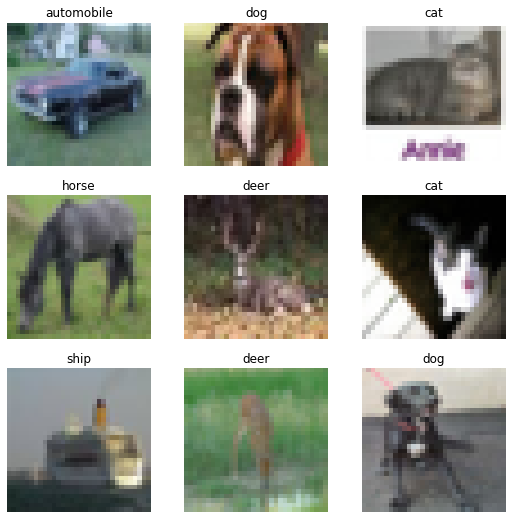

In [7]:
dls.show_batch()

In [8]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)

epoch,train_loss,valid_loss,error_rate,time
0,1.700099,None,None,00:45


/opt/conda/envs/computer_vision/lib/python3.8/site-packages/fastprogress/fastprogress.py:74: UserWarning: Your generator is empty.
  warn("Your generator is empty.")


epoch,train_loss,valid_loss,error_rate,time
0,0.943150,None,None,00:48


SuggestedLRs(lr_min=1.0964781722577755e-07, lr_steep=9.12010818865383e-07)

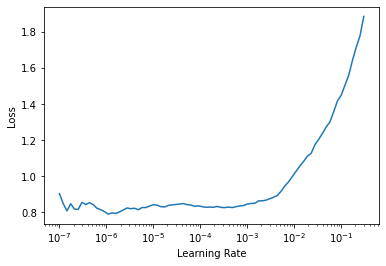

In [9]:
learn.lr_find()

## Add Transforms

In [10]:
from train_classification_lightning import choose_dataset

In [11]:
mean, std, traindir, valdir, num_c = choose_dataset('cifar10')

In [14]:
#import torchvision.transforms as transforms
#data_transform_normal = transforms.Compose([
#            transforms.Resize((300,300)),
#            #transforms.CenterCrop((100, 100)),
#            transforms.RandomCrop((250, 250), padding=4),
#            transforms.RandomHorizontalFlip(p=0.5),
#            #transforms.RandomRotation(degrees=(-90, 90)),
#            #transforms.RandomVerticalFlip(p=0.5),
#            transforms.ToTensor(),
#            transforms.Normalize(mean, std)
#            ])

In [15]:
item_tfms = [ToTensor, RandomResizedCrop(128, min_scale=0.35)]

In [13]:
# default fastai transforms
tfms = get_transforms(max_rotate=25)
len(tfms)

NameError: name 'get_transforms' is not defined

In [20]:
dls = ImageDataLoaders.from_folder(cifar10, train='train', 
                                   valid='valid', device=1, 
                                   item_tfms=data_transform_normal)

Could not do one pass in your dataloader, there is something wrong in it


In [ ]:
learn = cnn_learner(dls, resnet18, metrics=error_rate)
learn.fine_tune(1)